In [71]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("model.csv", sep=",")

df  #importing the observations

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


## Checking missing values

In [72]:
df.isnull().sum()  ##Checking the missing values 

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [73]:
df = df.dropna() # Dropping NaN values 
df = df.reset_index(drop=True) #due to the low number of missing values (<5%) we can drop all the 5091 rows containing NaN
df

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97255,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
97256,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
97257,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
97258,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


## Numerical and categorical division

In [74]:
#changing the type of some variables in order to treat them as categorical

df.Policy_Sales_Channel = df.Policy_Sales_Channel.astype('object')
df.Region_Code = df.Region_Code.astype('object')
df.Driving_License = df.Driving_License.astype('object')

#dividing numerical and categorical variables
df_categorical = df[['Gender','Driving_License','Region_Code', 'Licence_Type',
                  'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']]


df_categorical.dtypes

Gender                  object
Driving_License         object
Region_Code             object
Licence_Type            object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Policy_Sales_Channel    object
dtype: object

In [75]:
df_numerical = df[['Age','Annual_Premium', 'Seniority', 'Target']]
df_numerical.dtypes

Age               int64
Annual_Premium    int64
Seniority         int64
Target            int64
dtype: object

## Categorical data

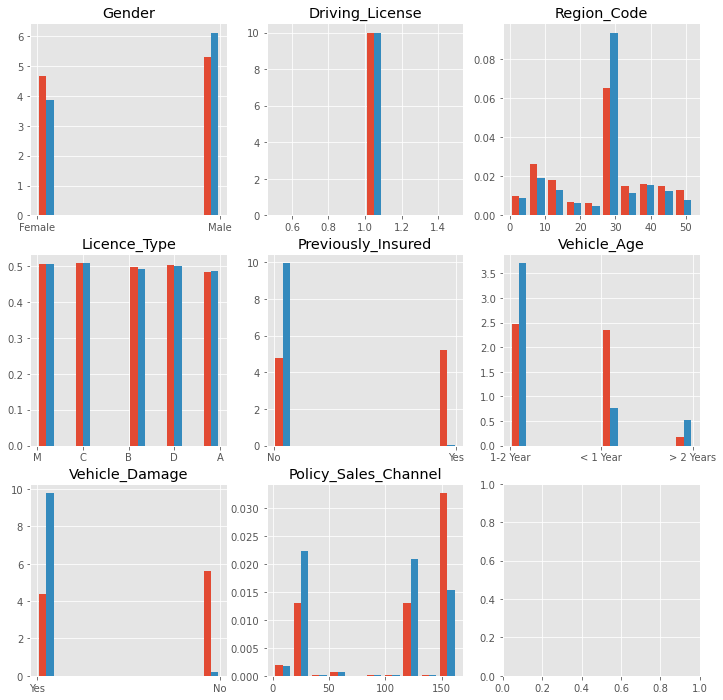

In [76]:
#univariate analysis

df_0=df_categorical[df['Target']==0] 
df_1=df_categorical[df['Target']==1] 


fig, axes = plt.subplots(3, 3,figsize=[12,12])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


In [77]:
#the License_Type variable can be deleleted given the same frequency of 0 and 1. So the 5091 deleted rows can be taken back 
#in order to drop all the variable License_Type

df = pd.read_csv("model.csv", sep=",") 

df.Policy_Sales_Channel = df.Policy_Sales_Channel.astype('object')
df.Region_Code = df.Region_Code.astype('object')
df.Driving_License = df.Driving_License.astype('object')

df_categorical = df[['Gender','Driving_License','Region_Code', 'Licence_Type',
                  'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']]

df_numerical = df[['Age','Annual_Premium', 'Seniority', 'Target']]

df.shape

(102351, 13)

In [78]:
#the categorical variables need to be converted using the dummies method
dummies = pd.get_dummies(df_categorical[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']],drop_first=True) 

dummies.tail()

,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
102346,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102348,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102349,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
102350,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e8a43d0>,
      dtype=object)

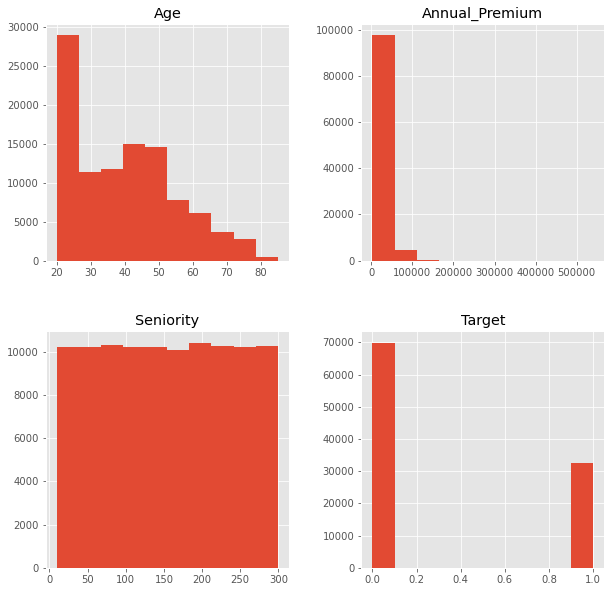

In [79]:
df_numerical.hist(figsize=(10,10))

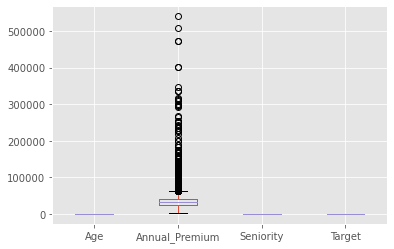

In [80]:
df_numerical.boxplot()

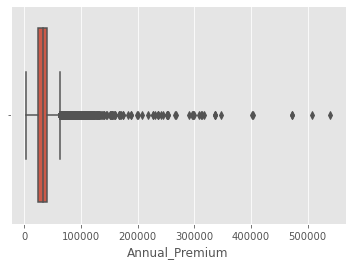

In [81]:
sns.boxplot(x=df_numerical['Annual_Premium'])

In [82]:
df_numerical['Annual_Premium'].describe()

count    102351.000000
mean      30748.636398
std       17544.726810
min        2630.000000
25%       24435.500000
50%       31943.000000
75%       39774.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [83]:
#Chebyshev’s Theorem:
df_numerical[df_numerical['Annual_Premium']>80000].shape # values > mean + 3std
#df_numerical[df_numerical['Annual_Premium']<-20000].shape values < mean - 3std

(657, 4)

In [84]:
#Removing outliers
df = df[df.Annual_Premium < 80000]
df.reset_index(drop = True, inplace = True)
# redefine the two subsets
df_categorical = df[['Gender','Driving_License','Region_Code', 'Licence_Type',
                  'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']]

dummies = pd.get_dummies(df_categorical[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']],drop_first=True) 

df_numerical = df[['Age','Annual_Premium', 'Seniority', 'Target']]

df

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101689,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
101690,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
101691,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
101692,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


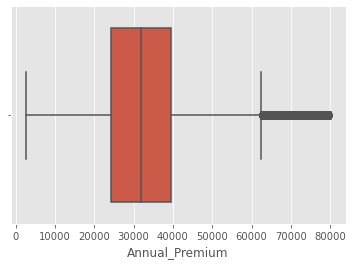

In [85]:
sns.boxplot(x=df_numerical['Annual_Premium'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba1a520>,
      dtype=object)

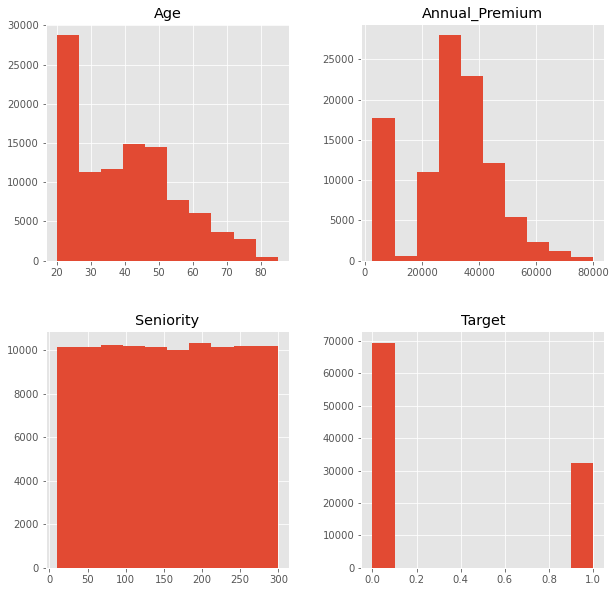

In [86]:
df_numerical.hist(figsize=(10,10))

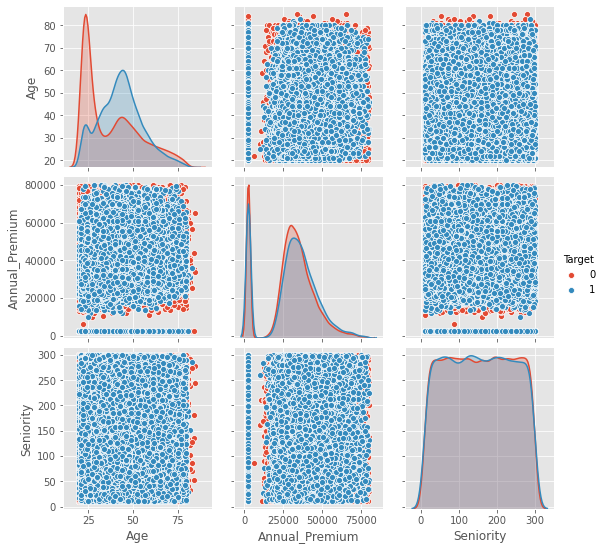

In [87]:
sns.pairplot(df_numerical[['Age','Annual_Premium', 'Seniority', 'Target']] , hue='Target')

In [88]:
#dropping attribute: Senority
df_numerical = df_numerical[['Age','Annual_Premium', 'Target']]
df_numerical

,Age,Annual_Premium,Target
0,44,25741,0
1,23,2630,0
2,43,70720,0
3,60,48512,0
4,42,32169,0
...,...,...,...
101689,25,34695,0
101690,47,30564,1
101691,72,52844,1
101692,25,26343,0


## Standardization

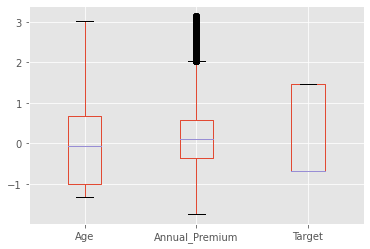

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_numerical)  
scaled_df = pd.DataFrame(scaler.transform(df_numerical))
scaled_df.columns = df_numerical.columns

scaled_df.boxplot()

In [90]:
X_numerical=scaled_df[['Age','Annual_Premium']]

dummies.reset_index(drop=True,inplace=True)
X_numerical.reset_index(drop=True,inplace=True)

print(X_numerical.shape)
print(dummies.shape)
dummies

(101694, 2)
(101694, 198)


,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_152,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101689,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
101690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101691,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
101692,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [91]:
X=pd.concat([dummies,X_numerical], axis = 1)
print(X.shape)
X

(101694, 200)


,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Age,Annual_Premium
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0.279064,-0.284185
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.128456,-1.742687
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.212040,2.554375
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.351461,1.152860
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.145015,0.121477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.994407,0.280889
101690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.480139,0.020188
101691,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2.155758,1.426246
101692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.994407,-0.246194


In [92]:
y

17731     0
49296     0
14622     0
4463      0
94288     0
         ..
101680    1
101684    1
101687    1
101690    1
101691    1
Name: Target, Length: 64464, dtype: int64

Target
0.0    32232
1.0    32232
dtype: int64


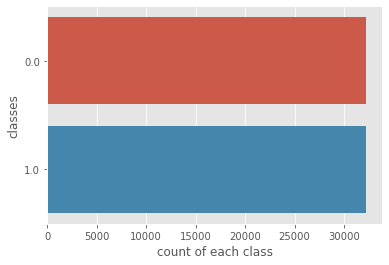

In [93]:
#downsampling the X and the y (non splittate)
# the downsampling method is applied after the separation obtaining a balanced training set and an unbalanced test set
 
print(pd.concat([X,y], axis = 1).groupby('Target').size()) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=pd.concat([X,y], axis = 1).Target ,data=pd.concat([X,y], axis = 1))
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show() 

In [69]:
from sklearn.utils import resample 
#Down-sample Majority Class
#1) Separate majority and minority classes

#the downsampling is applied to the concatenated matrix because the target is needed
df_majority = pd.concat([X,y], axis = 1)[pd.concat([X,y], axis = 1).Target==0] 
df_minority = pd.concat([X,y], axis = 1)[pd.concat([X,y], axis = 1).Target==1] 

#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=22562,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
Xy_train = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
Xy_train.Target.value_counts() 
Xy_train.shape

(54794, 201)

## Separate Train/Test set

In [33]:
y=df['Target']
y.shape

(101694,)

In [34]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train0, X_test, y_train0, y_test= train_test_split(X, y, 
                                                    test_size =0.30, #we divide by 30-70%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train0.shape, X_test.shape)
X_train0.tail()

(71185, 200) (30509, 200)


,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Age,Annual_Premium
29522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.324159,0.297928
101523,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.150387,1.816131
87980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.262506,-0.035032
90823,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.815263,0.487570
54615,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.659283,0.473433


In [35]:
pd.concat([X_train0,y_train0], axis = 1) # using "concat" function because Downsampling needs the variable Target

,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Age,Annual_Premium,Target
76843,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.195481,0.266374,0
30186,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.954684,-1.742687,0
12094,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.279064,0.154230,0
68109,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.061431,1.410785,0
82963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.793332,-1.742687,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.324159,0.297928,1
101523,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.150387,1.816131,0
87980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1.262506,-0.035032,0
90823,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.815263,0.487570,1


## Check imbalance

Target
0    69462
1    32232
dtype: int64


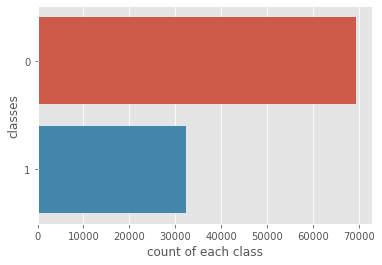

In [36]:
#Print class freq. through pandas 
print(df.groupby('Target').size()) 

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.Target ,data=df) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show() #Given the unmbalanced dataset it's applaied the downsampling

## Downsampling

Target
0    48623
1    22562
dtype: int64


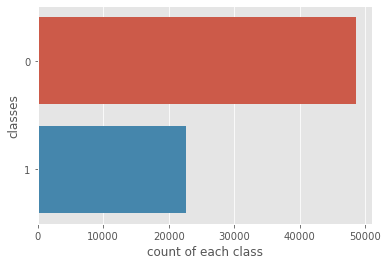

In [37]:
# the downsampling method is applied after the separation obtaining a balanced training set and an unbalanced test set
 
print(pd.concat([X_train0,y_train0], axis = 1).groupby('Target').size()) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=pd.concat([X_train0,y_train0], axis = 1).Target ,data=pd.concat([X_train0,y_train0], axis = 1))
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show() 

In [38]:
from sklearn.utils import resample 
#Down-sample Majority Class
#1) Separate majority and minority classes

#the downsampling is applied to the concatenated matrix because the target is needed
df_majority = pd.concat([X_train0,y_train0], axis = 1)[pd.concat([X_train0,y_train0], axis = 1).Target==0] 
df_minority = pd.concat([X_train0,y_train0], axis = 1)[pd.concat([X_train0,y_train0], axis = 1).Target==1] 

#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=22562,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
Xy_train = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
Xy_train.Target.value_counts() 
Xy_train.shape

(45124, 201)

In [62]:
y=df_downsampled['Target']
y



17731     0
49296     0
14622     0
4463      0
94288     0
         ..
101680    1
101684    1
101687    1
101690    1
101691    1
Name: Target, Length: 64464, dtype: int64

SyntaxError: invalid syntax (<ipython-input-67-c3168e0532d9>, line 1)

Target
0    22562
1    22562
dtype: int64


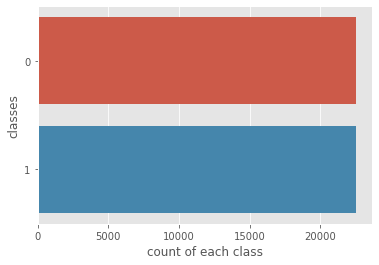

In [39]:
#verifying that the training set is balanced
#Print class freq. through pandas 
print(Xy_train.groupby('Target').size()) 
#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=Xy_train.Target ,data=Xy_train) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show() 

In [40]:
#dividing the training set varaibles from the training set target.
y_train = Xy_train['Target']
X_train = Xy_train.drop(columns=['Target'])
X_train 

,Gender_Male,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Age,Annual_Premium
75928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.726308,-0.254019
85274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.145015,0.549227
84924,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,-1.128456,-1.742687
54825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1.061431,0.539508
7026,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.212040,0.600660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32740,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.346089,0.669512
90216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.212040,-0.374683
36377,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.949312,-0.020581
29522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.324159,0.297928


## Multi-Layer perceptron classifier 


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score

In [42]:
#applying the model chosen
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(5, 2),
              activation='relu', alpha=0.01, batch_size='auto',              
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, solver='lbfgs', tol=0.01,
              validation_fraction=0.2, verbose=True)


In [43]:
#training the model
model.fit(X_train, y_train)
model.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [44]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.01,0.1]}
#hidden_layer_sizes : The ith element represents the number of neurons in the ith hidden layer.

In [45]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [46]:
#searching the best hyperparameters
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  12 out of  18 | elapsed:  8.9min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  9.1min remaining:  3.5min
[Parallel(n_jobs=-1)

In [47]:
#printing the best hyperparameters
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.819122 using {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
0.813276 (0.002423) with: {'alpha': 0.001, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
0.781834 (0.004846) with: {'alpha': 0.001, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000}
0.816193 (0.003998) with: {'alpha': 0.01, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
0.777720 (0.008737) with: {'alpha': 0.01, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000}
0.819122 (0.002573) with: {'alpha': 0.1, 'hidden_layer_sizes': (10, 5), 'max_iter': 2000}
0.791222 (0.007748) with: {'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000}


In [48]:
#TEST ON THE UNBALANCED TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [49]:
#COMPUTING F1 FOR THE X_TEST
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.70629287442008


In [50]:
#PRINTING THE ROC CURVE
from sklearn import metrics

model=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.01, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr3, tpr3, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

NameError: name 'fpr' is not defined

In [51]:
#TRAINING THE MODEL ON THE UNBALANCED TRAINING SET
best_model = gs.best_estimator_
y_pred = best_model.predict(X_train0)

In [52]:
#COMPUTING F1 FOR THE X_TRAIN0
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_train0, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.7056866406382618


In [ ]:
#PRINTING THE ROC
from sklearn import metrics

model=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.01, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_train0)

y_probs = model.predict_proba(X_train0) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr4, tpr4, thresholds=metrics.roc_curve(y_train0,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_train0, y_probs[:,1])
print('AUC: %.2f' % auc)

In [53]:
#making predictions 

df2 = pd.read_csv('prediction_independent.csv')
df2

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority
0,1,Male,51,1,M,28,No,1-2 Year,Yes,45301,26,31
1,2,Male,63,1,B,39,No,1-2 Year,Yes,18609,124,28
2,3,Male,76,1,M,38,No,1-2 Year,Yes,35081,26,164
3,4,Female,38,1,B,41,No,1-2 Year,Yes,19603,124,33
4,5,Female,21,1,D,30,Yes,< 1 Year,No,27842,160,28
...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,Male,38,1,C,3,Yes,1-2 Year,No,2630,26,285
45192,45193,Male,46,0,NaN,41,No,> 2 Years,Yes,36518,124,55
45193,45194,Male,23,1,C,30,Yes,< 1 Year,No,21721,152,286
45194,45195,Male,45,1,B,7,No,1-2 Year,Yes,2630,156,17


In [54]:
#pd.options.mode.chained_assignment = None  # default='warn'

df2_categorical=df2[['Gender','Driving_License','Region_Code', 'Licence_Type',
                  'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']]

df2.Policy_Sales_Channel = df2.Policy_Sales_Channel.astype('object')
df2.Region_Code = df2.Region_Code.astype('object')
df2.Driving_License = df2.Driving_License.astype('object')

# Categorical
dummies2 = pd.get_dummies(df2_categorical[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']],drop_first=True) 

# Numerical
df2_numerical=df2[['Age','Annual_Premium', 'Seniority']]

# Scaling - WE MUST USE THE SAME SCALING OF THE TRAIN!
scaled_df2 = pd.DataFrame(scaler.transform(df2_numerical))
scaled_df2.columns = df2_numerical.columns

# Feature selection
X2_numerical=scaled_df2[['Age','Annual_Premium','Seniority']]
X2=pd.concat([dummies2,X2_numerical], axis = 1)



In [55]:
X.columns

Index(['Gender_Male', 'Region_Code_1', 'Region_Code_2', 'Region_Code_3',
       'Region_Code_4', 'Region_Code_5', 'Region_Code_6', 'Region_Code_7',
       'Region_Code_8', 'Region_Code_9',
       ...
       'Policy_Sales_Channel_154', 'Policy_Sales_Channel_155',
       'Policy_Sales_Channel_156', 'Policy_Sales_Channel_157',
       'Policy_Sales_Channel_158', 'Policy_Sales_Channel_159',
       'Policy_Sales_Channel_160', 'Policy_Sales_Channel_163', 'Age',
       'Annual_Premium'],
      dtype='object', length=200)

In [56]:
y2_pred=model.predict(X2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 200 is different from 10)